## Introduction

In this mini project, you will explore and analyze the Google Apps dataset. There is no question so you will have to be self motivated in finding out what you want to know about this data, what looks interesting to you and what results to want to communicate.

We will provide some questions and examples as initial guidance. You can (and should) also discuss with the tutors and other class mates on ideas, things you want to achieve and Python techniques during class.

In [95]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
apps = pd.read_csv('googleplaystore.csv')

In [97]:
apps = apps.dropna()

In [98]:
apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7.0,2.6M,500+,Free,0,Everyone,Education,2017-06-18,1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53M,"5,000+",Free,0,Everyone,Education,2017-07-25,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6M,100+,Free,0,Everyone,Education,2018-07-06,1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device


In [ ]:
apps.Android_Ver

### One of the greatest qualities of a data analyst is the ability to ask questions yourself. Be curious about your data.

Below is a suggested workflow and some questions to motivate you. Try to think of other questions as well.

In [99]:
apps.Rating = apps.Rating.astype(float)
apps.Reviews = apps.Reviews.astype(int)
apps.Size = apps.Size.str.replace('M', '')
apps.Size = apps.Size.str.replace('k', '')
apps.Size = apps.Size.str.replace('Varies with device', '0').astype(float)
apps.Installs = apps.Installs.str.replace('+', '')
apps.Installs = apps.Installs.str.replace(',', '').astype(int)
apps.Price = apps.Price.str.replace('$', '').astype(float)
apps = apps.drop_duplicates()
apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6,500,Free,0.0,Everyone,Education,2017-06-18,1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,0.0,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device


In [100]:
print(apps.dtypes)

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


In [101]:
apps.Category = apps.Category.str.replace('_', ' ')

In [102]:
capps = apps

1- Inspect the data, calculate some statistics and write some comments on interesting observations.


2- Data cleaning:
    - Use string slicing and string methods to change columns like 'Size', 'Installs', 'Price', ... to numbers
    - Remove duplicate rows


3- Visualize and comment on some or all columns. For example:
    - Which categories have the most apps? Which categories are most popular (by installs)?
    - What is the range of application size (maybe using a boxplot?)
    - Visualize the distribution of price for paid apps only
    - How many apps have multiple genres?
    - Plot a bar chart for Last Updated by year


4- More possibly interesting questions to explore:
    - Can you make a scatter plot to show the relationship between rating and number of installs?
    - Do free apps have more installs than paid apps on average?
    - Which categories appear the most among top 100 most expensive apps?
    - Can you show the top 100 most common words that appear in apps name?

5- Alternatively, you can also pick a category that you like and do in-depth analysis on that category. For example: Game apps
    - Make a chart that shows the relationship between price, ratings and review.
    - What are the most popular genres?
    - Are games that support more android devices more popular?

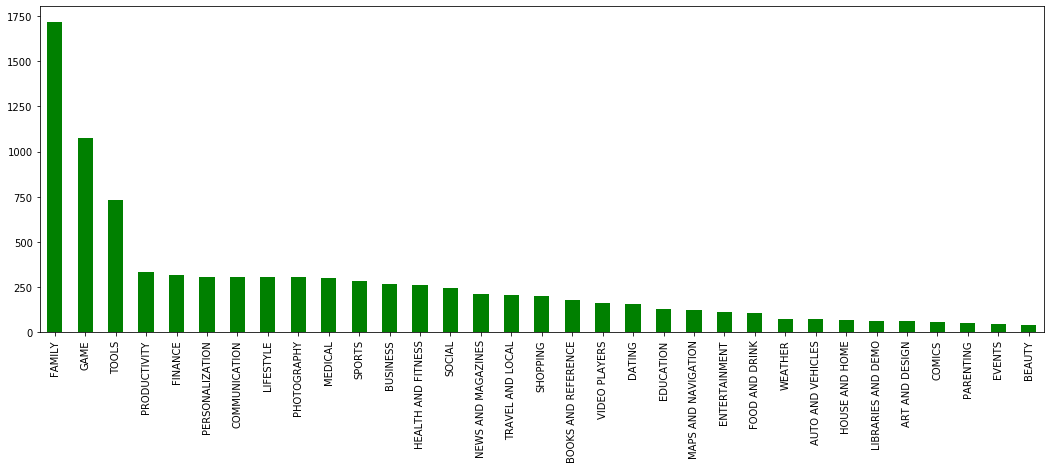

In [103]:
capps.Category.value_counts().plot(kind = 'bar', color = 'g', figsize = (18,6))

In [ ]:
#From this bar chart, it is visible, that Family Category has the most applications, followed by Game, etc.

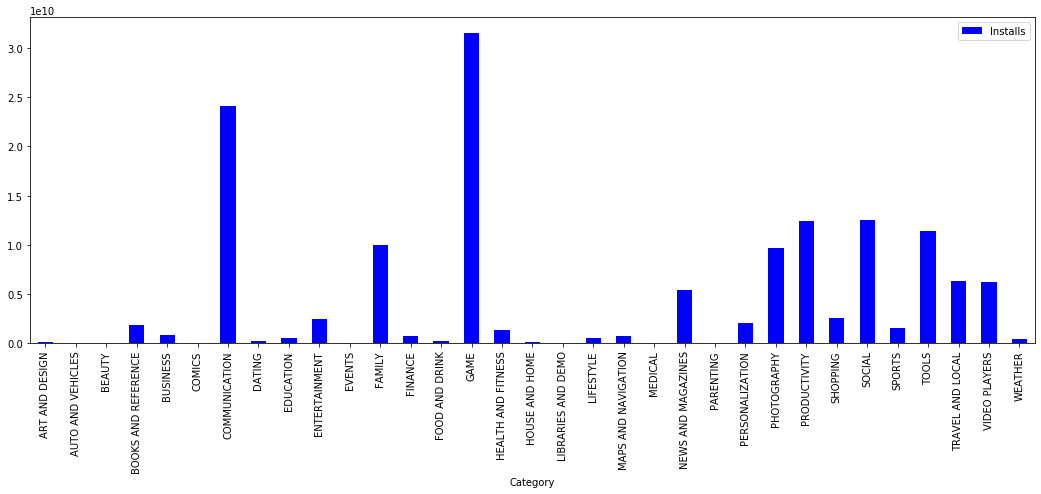

In [104]:
gb = capps.groupby('Category')
gb[['Installs']].sum().plot(kind = 'bar', color = 'blue', figsize = (18,6))

In [ ]:
# It would appear that the most popular categories, based on number of installations, are Games and Communication by far, 
# followed by Productivity, Social, Tools, and Family and then the rest.

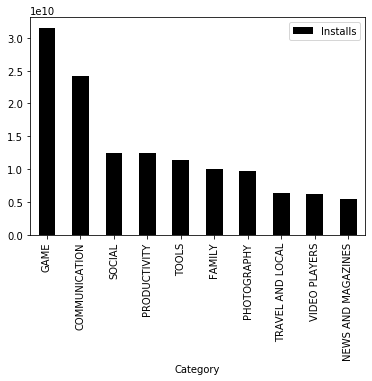

In [105]:
grouped = capps.groupby('Category').sum().sort_values('Installs', ascending = False)
grouped[['Installs']].head(10).plot(kind = 'bar', color = 'black')

In [ ]:
# On this bar chart, we can see the Top 10 most popular application Categories based on amount of Installations.

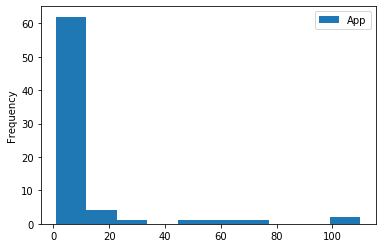

In [106]:
payed_apps = capps[['Price', 'App']].groupby('Price').count().sort_values('Price')
payed_apps = payed_apps.drop(0.00)
#payed_apps
payed_apps.plot.hist()

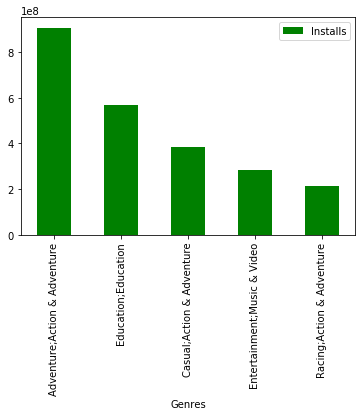

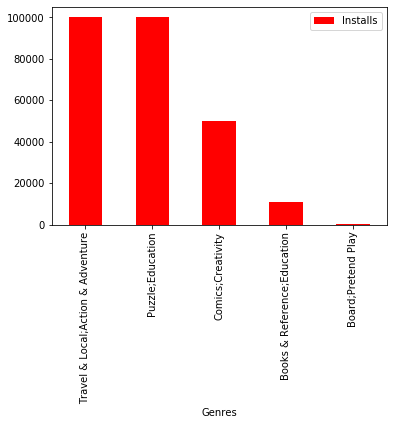

In [107]:
app_genre = capps[(capps.Genres.str.count(';') >=1)]
#app_genre
gb_ag = app_genre[['Genres', 'Installs']].groupby('Genres').sum().sort_values('Installs', ascending = False)
gb_ag.head(5).plot(kind = 'bar', color = 'green')
gb_ag.tail(5).plot(kind = 'bar', color = 'red')

In [ ]:
#These 2 charts show how many installs do applications with specific genre-combinations have. On the first chart, we can see
#the top 5 most installed genre-combinations, and the bottom chart shows the bottom 5 least installed genre-comboes. As we
#can see, by far the most popular genre-combination is Adventure;Action & Adventure, and the least popular are Board;Pretend
#Play.

In [109]:
capps_multiple_genres = capps[capps.Genres.str.count(';') >= 1]

In [110]:
capps_multiple_genres.Genres = capps_multiple_genres.Genres.str.split(';')

In [111]:
x = capps_multiple_genres.sort_values('Genres')

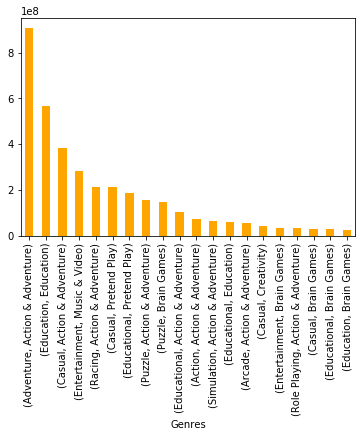

In [123]:
alt_x = x.groupby(x['Genres'].map(tuple)).sum().Installs
alt_x.nlargest(20).plot(kind = 'bar', color='orange')

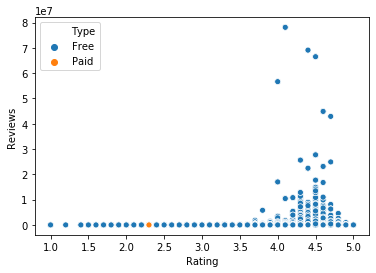

In [108]:
g = sns.scatterplot(x='Rating', y='Reviews', hue='Type', data=capps)

In [ ]:
#Interestingly enough, it seems that the highest rated and most reviewed appilcations are all free. There's barely any paid
#applications showing up on the chart, the one that is visible is rated below average and barely reviewed. Although it does
#not come as a surprise, since the free apps are available for everyone, thus making them easy to review and score.

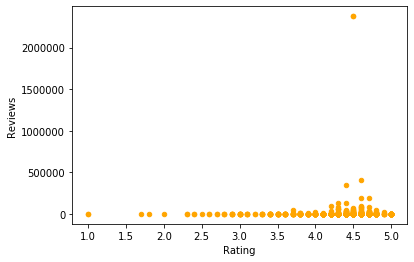

In [135]:
rrp_relation = capps[['Rating', 'Reviews', 'Type']]
rrp_relation = rrp_relation[rrp_relation.Type != 'Free']
rrp_relation.plot(kind='scatter', x='Rating', y='Reviews', color = 'orange')

In [ ]:
#Here is the previous chart but only with the Paid applications for further analysis. It can be seen why the paid apps are
#practically invisible on the previous chart, they are lost among all the free apps on the chart.

### Remember to comment something after you produce a statistic table or chart to summarize the results or discuss things that you found interesting.

Communication is also an important skill in data analysis. Without meaningful summary and comments, people won't understand your beautiful chart.

<p style="color:green;">Example</p>

Group the data by category and explore the average rating

In [12]:
gb = apps.groupby('Category')

cat_mean = gb.mean()

cat_mean

,Rating,Reviews
Category,,
ART_AND_DESIGN,4.358065,2.637600e+04
AUTO_AND_VEHICLES,4.190411,1.369019e+04
BEAUTY,4.278571,7.476226e+03
BOOKS_AND_REFERENCE,4.346067,9.506090e+04
BUSINESS,4.121452,3.033598e+04
COMICS,4.155172,5.638793e+04
COMMUNICATION,4.158537,2.107138e+06
DATING,3.970769,3.115931e+04
EDUCATION,4.389032,2.538191e+05


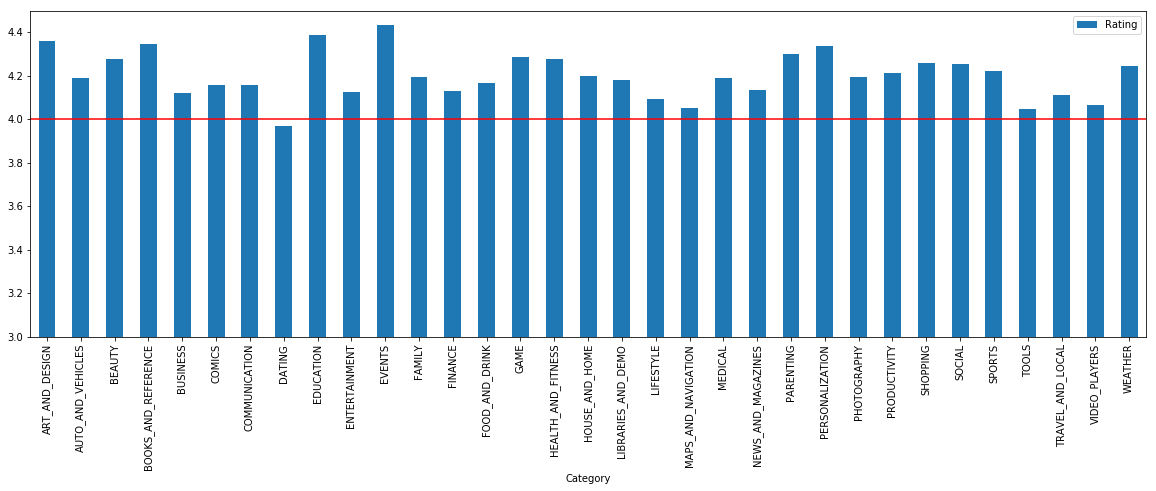

In [31]:
rating = cat_mean.plot(kind='bar', y='Rating', figsize=(20,6))

rating.set_ylim(3, 4.5)

rating.axhline(y=4, color='r')

We can see that Events apps are usually rated very high in the market. Other highly rated categories are Art, Books and Education.

All categories except Dating apps have an average rating above 4. It could either be that people are often frustrated with dating apps, or that these apps tend to have poor design and functionality.

### Additionally, you can look for well made notebooks on kaggle.com. Here is one good example on the Titanic dataset that you can draw inspiration from:

https://www.kaggle.com/ash316/eda-to-prediction-dietanic



### Now it's your turn to explore the data